In [31]:
from align import *
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

def align(refFilename, imFilename):
    # Read reference image
    print("Reading reference image : ", refFilename)
    imReference = cv2.imread(refFilename, cv2.IMREAD_COLOR)

    # Read image to be aligned
    print("Reading image to align : ", imFilename);  
    im = cv2.imread(imFilename, cv2.IMREAD_COLOR)
#     im = cv2.resize(im, (imReference.shape[1], imReference.shape[0]), interpolation = cv2.INTER_NEAREST)

    print("Aligning images ...")
    # Registered image will be resotred in imReg. 
    # The estimated homography will be stored in h. 
    imReg, h = alignImages(im, imReference)

    # Print estimated homography
    print("Estimated homography : \n",  h)
    return imReference, im, imReg

Reading reference image :  data/form.jpg
Reading image to align :  data/scanned-form.jpg
Aligning images ...
Estimated homography : 
 [[ 1.39410158e+00 -2.00799432e-01 -8.38501433e+00]
 [ 2.21486061e-01  1.51141269e+00 -4.78696622e+02]
 [-6.63760728e-05  1.17767381e-04  1.00000000e+00]]


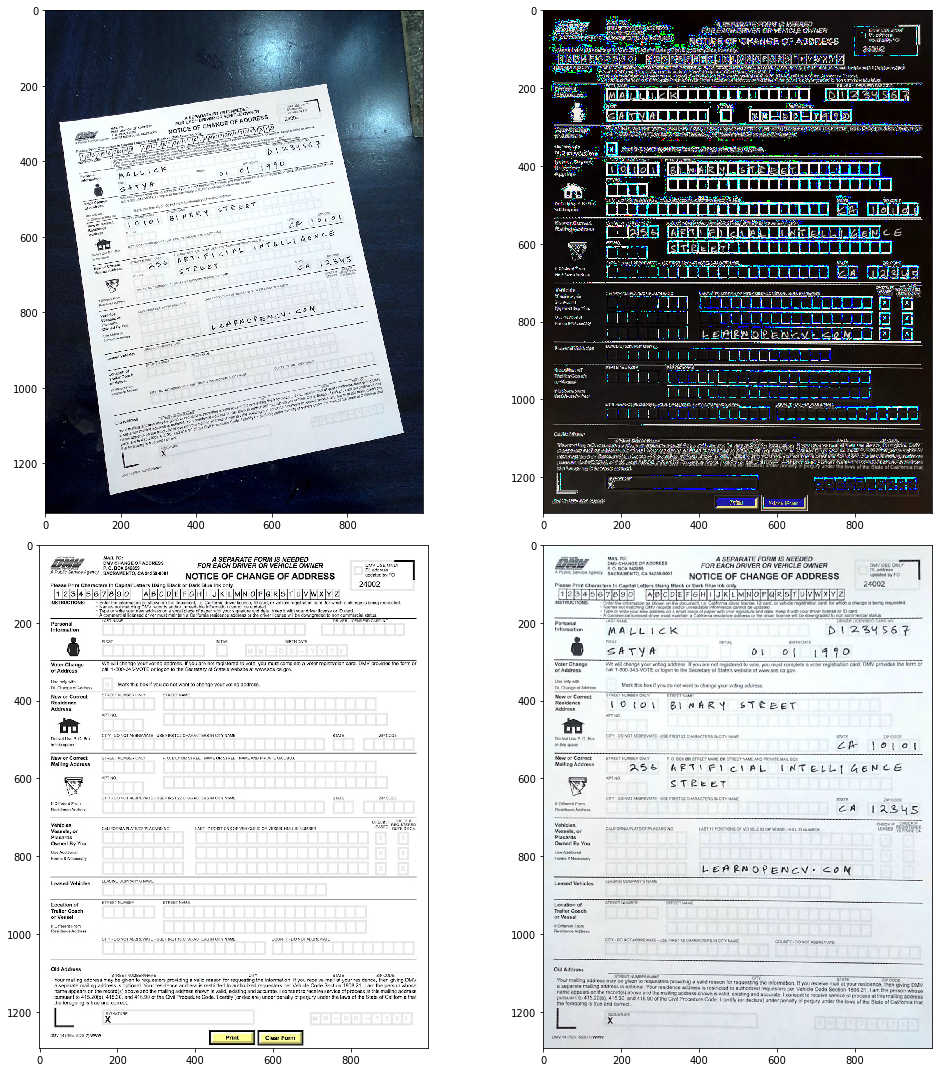

In [34]:
refFilename = "data/form.jpg"
imFilename = "data/scanned-form.jpg"
imReference, im, imReg = align(refFilename, imFilename)

_, axes = plt.subplots(2,2, figsize=(15,15))
axes[0,0].imshow(im)
axes[1,0].imshow(imReference)
axes[0,1].imshow(np.abs(imReference-imReg))
axes[1,1].imshow(imReg)
plt.tight_layout()

Reading reference image :  data/target.png
Reading image to align :  data/source.png
Aligning images ...
Estimated homography : 
 [[ 2.95794093e-02 -8.71696953e-01  1.48989188e+02]
 [ 5.22994016e-02 -1.69691054e+00  2.87812293e+02]
 [ 2.85683967e-04 -6.33292295e-03  1.00000000e+00]]


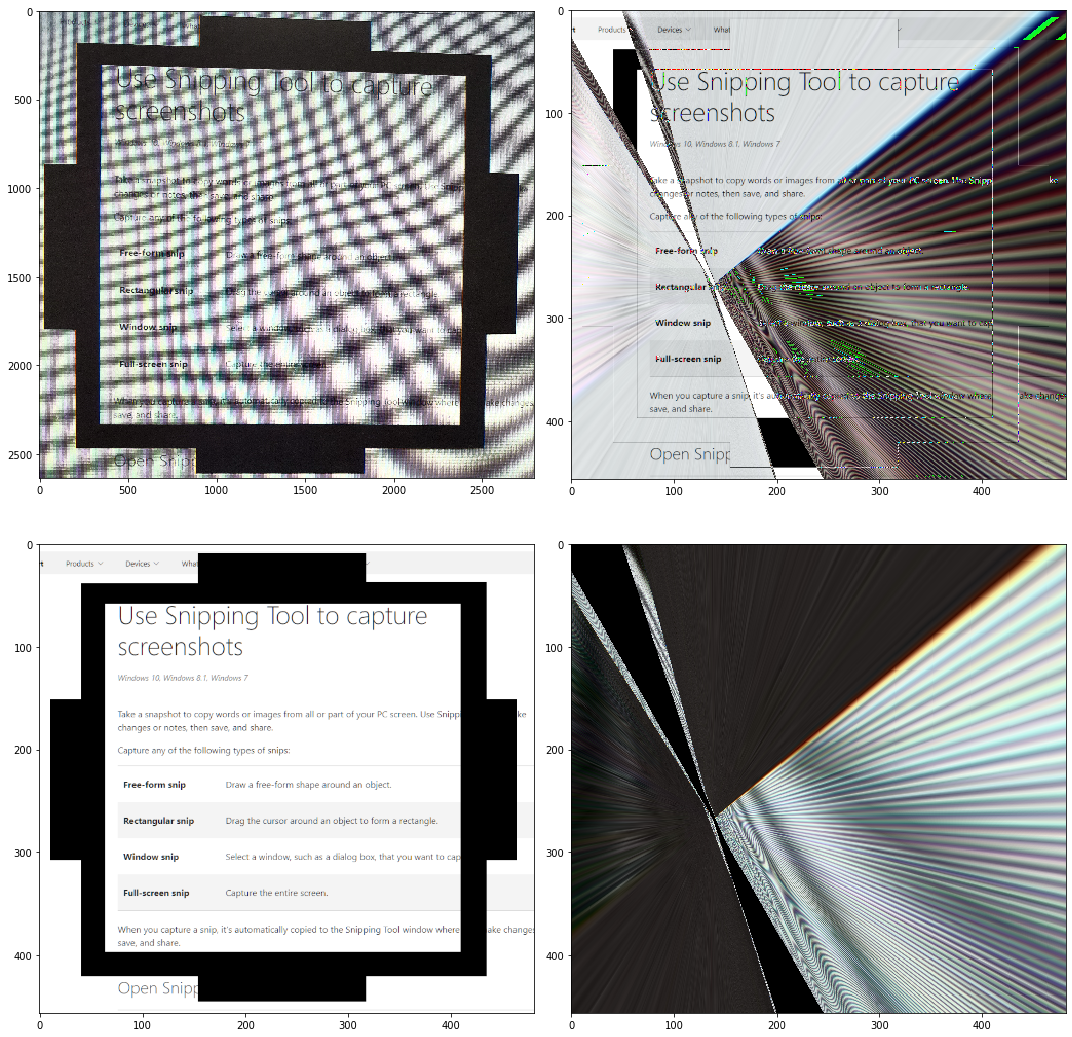

In [36]:
refFilename = "data/target.png"
imFilename = "data/source.png"
imReference, im, imReg = align(refFilename, imFilename)

_, axes = plt.subplots(2,2, figsize=(15,15))
axes[0,0].imshow(im)
axes[1,0].imshow(imReference)
axes[0,1].imshow(np.abs(imReference-imReg))
axes[1,1].imshow(imReg)
plt.tight_layout()

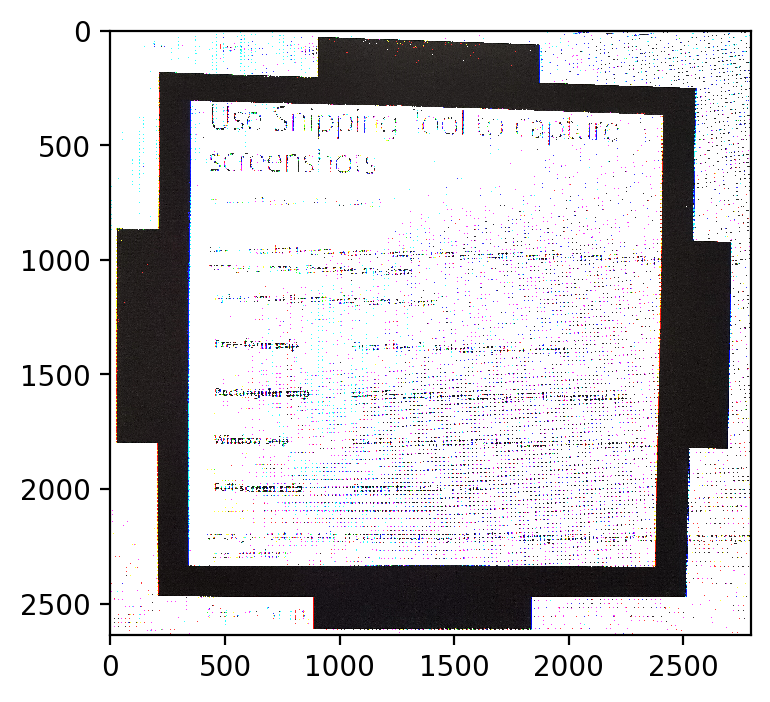

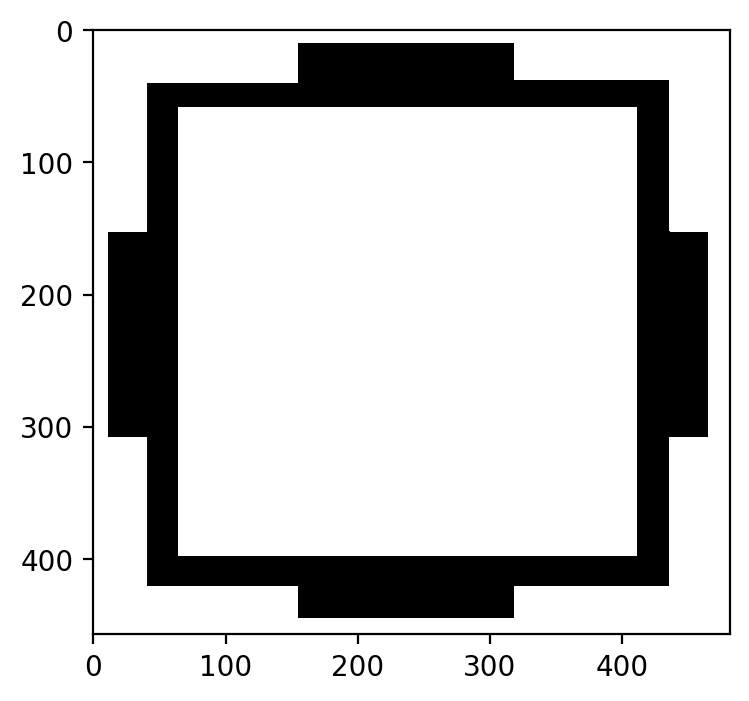

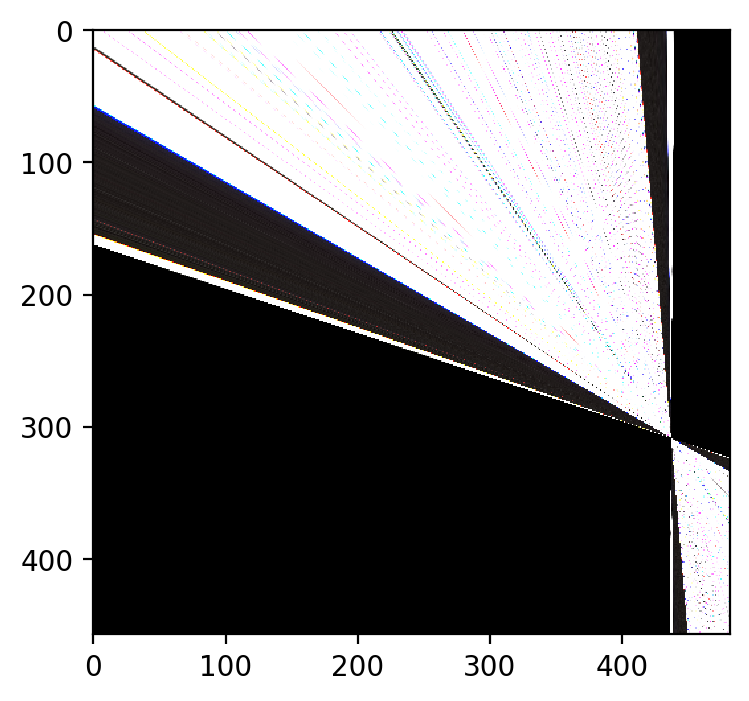

In [71]:
plt.figure(dpi=200)
pim = 255-(im<60)*(255-im)
imshow(pim)

plt.figure(dpi=200)
pimReference = 255-(imReference < 10)*(255-imReference)
imshow(pimReference)

imReg, h = alignImages(pim, pimReference)
plt.figure(dpi=200)
imshow(imReg)